In [ ]:
import pandas as pd
from google_drive_downloader import GoogleDriveDownloader as gdd
from pathlib import Path
from typing import List, Dict
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random
import string

# HW Instructions

## 🚧 Cells
All the cells identified with a 🚧 should be completed, either by a code or an written answer.
You can add as many cells as you want, but in general cells are already in place.


🚧 **TODO** 🚧

*Requires to complete a code (can be completed with optional text cells if you find it relevant).*

or

🚧 **Question** 🚧

*Requires a written answer (can be completed with optional code cells if you find it relevant).*

## 🔴 Test cells
Cells identified with 🔴 should be left untouched and shouldn't return any error.

## Presentation
The overall presentation of the notebook will account in the grading process.
Some advice:
- Give title to your figures.
- Put legends on the figures.
- Comment the figures if they are not self-explanatory.
- Add comment in the code if not self-explanatory.
- Review your notebook before submitting.
- Feel free to add any additional illustration if you find it will bring something.
- Remain as concise as possible when answering written answer, emphasize the important points.

**We cannot debug every notebooks. The notebook should run entirely from the start to the end without any error. If one cell returns an error during the execution, only the cells before the error will be graded.**



# HW Introduction

## Hands on with NLP preprocessing

This first TP is here to make you experiment with the first preprocessing steps, necessary but often not emphasized enough.

## Plan

1. Load the data
2. Analyze and clean the text data
3. Format the texts for NLP (i.e. tokenize, etc).

## Notations

Throughout the HW, a text will be called either **document** or **text**.


# I - Data loading

In [ ]:
def download_imdb(output_path: str, force_download: bool = False):
    """Save the data to `output_path`."""
    output_path = Path(output_path)
    if (not output_path.is_file()) or force_download:
        gdd.download_file_from_google_drive(
            file_id="1zfM5E6HvKIe7f3rEt1V2gBpw5QOSSKQz",
            dest_path=output_path,
        )
    return

In [ ]:
DATA_PATH = "data/imdb_reviews.csv"
download_imdb(output_path=DATA_PATH, force_download=False)

🚧 **TODO** 🚧

Read the file to a Pandas dataframe (the file is stored as a csv). Make sure the "review" field is of dtype `string` and label of dtype `int`.

Hint: https://pandas.pydata.org/docs/user_guide/text.html (you can specify the `dtype` argument of pandas constructor).


In [ ]:
dtype = {'review': str, 'label': int}
df_imdb = pd.read_csv(DATA_PATH, dtype=dtype)
df_imdb["review"] = df_imdb["review"].astype("string")

In [ ]:
text_column = df_imdb["review"]
label_column = df_imdb["label"]

🔴 **TEST**

In [ ]:
assert text_column.dtype == "string"
assert label_column.dtype == int

🚧 **TODO** 🚧

Print some values of the dataframe.
- Print 3 samples of text.
- Print their associated labels.
- Print some statistics of the dataset.



In [ ]:
print("==== 3 first texts ====")
for text in text_column[:3]:
    print(text)
    print("\n")


print("\n==== Associated labels of the 3 first texts ====")
for label in label_column[:3]:
    print(label)


print("\n=== Dataset statistics ===")
print("Number of texts")
print(len(text_column))


print("\nAverage text length (in characters)")
print(text_column.apply(len).mean())


print("\n% of positive texts")
positive_pourcentage = (label_column.sum() / len(label_column)) * 100
print(positive_pourcentage)

==== 3 first texts ====
Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.


This is an example of why the majority of action films are the same. Gene

## II - Clean and format the data.
For this first TP, we want to focus on very simple tasks.
Therefore, we want to avoid as much as possible rare and uncommon words that will be considered as outliers.

We will try to figure out what kind of cleaning we can perform, by having a look at the data.

The plan for this part will be:
1. Split the strings as a list of words.
2. Find the outliers in the corpus.
3. Propose some methods to clean them.

### 1. Tokenization
First, we will split our texts into words.
Splitting a string into a list of smaller substrings is called **tokenization**, and the substrings are called **tokens**.

The simplest way to tokenize a text is to split it by words, according to whitespaces.

Then, each word encountered in the training set is stored and uniquely identified through an id.



🚧 **Question** 🚧

By doing so, we put a huge emphasis on words within documents.

a) Intuitively, why is it relevant? For instance compare to splitting by character.

b) Cite some methods discussed during the course that rely on word-based representations of documents.

**Answer**

**a)**

Segmenting text into words makes sense because words, as the basic units of language, carry rich semantic information. Splitting by words better captures the meaning and context of text than splitting by characters.

**b)**
1. Bag of Words  : Represents text as a collection of words, ignoring order and syntax, and the occurrence of each word is treated as a feature.

2. Word Embeddings : Map words into a multi-dimensional space so that semantically similar words are close in this space.

3. Convolutional Neural Networks : CNNs capture local patterns and semantics by applying filters on word embeddings, aiding in structure and meaning recognition.


🚧 **TODO** 🚧

Implement a tokenizer based on whitespace splitting. For now, the tokenizer should only be able to store each unique word found in the dataset.

In [ ]:
class WhiteSpaceTokenizer:
    def __init__(self):
        # The vocabulary will store the mapping between text tokens and their id.
        self.vocab = {}
        self.id_to_token = {}

        # We will keep track of the number of times a word appears in the corpus.
        self.frequencies = {}

    def split_text(self, text: str) -> List[str]:
        """Converts the text to a list of tokens (substrings)."""
        # TODO
        list_tokens = text.split()
        return list_tokens

    def fit(self, corpus: List[str]):
        """Fits the tokenizer to a list of texts to construct its vocabulary."""
        current_id = 0
        for text in tqdm(corpus):

            # Split into substrings.
            list_tokens = self.split_text(text)

            for token in list_tokens:

                # Add the token to the vocabulary
                token_id = self.vocab.get(token, None)

                token_not_in_vocab = token_id is None
                if token_not_in_vocab:
                    self.vocab[token] = current_id#TODO
                    self.id_to_token[current_id] = token#TODO
                    self.frequencies[current_id] = 0
                    token_id = current_id
                    current_id += 1

                self.frequencies[token_id] += 1

        # Total number of words in vocab.
        self.num_words = len(self.vocab)#TODO
        print(f"Built a vocabulary of {self.num_words} words.")

🔴 **TEST**

In [ ]:
toy_corpus = ["a cat", "a dog"]
tokenizer = WhiteSpaceTokenizer()
tokenizer.fit(toy_corpus)
assert tokenizer.vocab == {"a": 0, "cat": 1, "dog": 2}
assert tokenizer.frequencies == {0: 2, 1: 1, 2: 1}
assert tokenizer.num_words == 3

  0%|          | 0/2 [00:00<?, ?it/s]

Built a vocabulary of 3 words.


🚧 **TODO** 🚧

Fits the tokenizer on the imdb reviews.

In [ ]:
# TODO
# Create a WhiteSpaceTokenizer object
tokenizer = WhiteSpaceTokenizer()

# Fit the tokenizer to the IMDb reviews dataset
tokenizer.fit(df_imdb["review"])#.tolist())


  0%|          | 0/62155 [00:00<?, ?it/s]

Built a vocabulary of 474682 words.


### 2. Noise analysis

🚧 **TODO** 🚧

Print 50 random tokens.

In [ ]:
# TODO
tokens = list(tokenizer.vocab)

# Shuffle the list of tokens.
random.shuffle(tokens)

# Print the first 50 tokens.
print(tokens[:50])


['worthing', 'idiotic:', 'LIFE!!!!!!!!!!!!!!!!!', 'maybe).John', '"Raiders..",', '(Farnsworth)', 'perfomances', '"loveable', 'Useless.', 'materialized', '"Poopchev"', 'deputize', 'TGWWT', 'sleigh.', 'foe.', 'saner', '\\"Direct', 'incantation', 'snobbery', '/>10', 'battleship)', 'Movement', 'Hessling,', 'trap"', '/>Thriller', 'Yey!', "'flashback'", 'vampirelady', '/>PAT', 'Truffles.', 'low-frequency', "'Deaf", 'scoundrel.', 'Changed', '"Belle-Maman"', 'Sketches', 'yeah.<br', 'film,that', 'contemplative.', '(\\"...who', '/>"Family', "Freleng's", 'stewardesses)', 'Spooks,', 'poignancy.', 'passport.', 'Chopin.', 'CHALICE)', 'maritally', 'Fury".']


🚧 **QUESTION** 🚧

What do you think of the tokens? Do they look like simple "words" as expected?

Analyze the noise and explain why we got such weird vocabulary.

**Answer**

1. a)  As you can see from the 50 random tokens we printed out, they contain a mix of uppercase and lowercase letters, as well as many symbols and special characters that we may not want to include in our vocabulary, such as exclamation marks, question marks, and angle brackets, etc.

   b) These are not simple words, but more like word combinations or fragments with punctuation and special characters.
   
   
2. a) Presence of Punctuation and Special Characters.('-,?,\')

   b) Inclusion of HTML Tags.('&lt;br&gt;')
   
   c) Insufficient Text Preprocessing('A,a').

### 3. Cleaning

🚧 **TODO** 🚧

You are going to implement some of the classical cleaning methods.
1. Lower case the string.
2. String normalization, i.e., replace accentuated characters by standard version ("â -> a") (hint: https://stackoverflow.com/a/14121678).
3. Remove non alpha-numeric characters (use Python regex package `re`).
4. Replace numeric characters by the token `'<NUM>'` (use the package `re`).
5. Remove double whitespaces (use the package `re`).


In [ ]:
import unicodedata
import re

In [ ]:
def preprocess_text(text: str) -> str:
    if isinstance(text, bytes):
      text = text.decode("utf-8")

    # TODO lower case
    text = text.lower()

    # TODO string normalization.
    text = unicodedata.normalize("NFD", text)
    text = re.sub(r"[^\x00-\x7F]", "", text)


    # TODO remove non alpha numeric characters.
    text = re.sub(r"[^\w\s]", " ", text)

    # Replace numbers by the <NUM> token
    text = re.sub(r"\d+", "<NUM>", text)

    # TODO remove double whitespaces.
    #text = re.sub(r"\s+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = re.sub(r"\.\s+", ".", text)

    return text


🔴 **TEST**

In [ ]:
noisy_text = "Ï   lîved  in    San-Françisco...  ! for 12 years."
clean_text = "i lived in san francisco for <NUM> years"
preprocess_text(noisy_text)
assert preprocess_text(noisy_text) == clean_text

🚧 **TODO** 🚧

Add column `clean_review` to the dataframe, with the clean text.

Store the `clean_review` column to the variable `clean_column`.

In [ ]:
# TODO
# Add the clean_review column to the df_imdb dataframe
df_imdb["clean_review"] = df_imdb["review"].apply(preprocess_text)

# Store the clean_review column to the variable clean_column
clean_column = df_imdb["clean_review"]

# Print the first few rows of the df_imdb dataframe
print(df_imdb["clean_review"].head(30))



0     once again mr costner has dragged out a movie ...
1     this is an example of why the majority of acti...
2     first of all i hate those moronic rappers who ...
3     not even the beatles could write songs everyon...
4     brass pictures movies is not a fitting word fo...
5     a funny thing happened to me while watching mo...
6     this german horror film has to be one of the w...
7     being a long time fan of japanese film i expec...
8     tokyo eyes tells of a <NUM> year old japanese ...
9     wealthy horse ranchers in buenos aires have a ...
10    cage plays a drunk and gets high critically pr...
11    first of all i would like to say that i am a f...
12    so tell me what serious boozer drinks budweise...
13    a big disappointment for what was touted as an...
14    this film is absolutely appalling and awful it...
15    here s a decidedly average italian post apocal...
16    at the bottom end of the apocalypse movie scal...
17    earth has been destroyed in a nuclear holo

🚧 **TODO** 🚧

Run the tokenizer on the clean text and print 50 random tokens.

In [ ]:
# TODO fit the tokenizer
tokenizer = WhiteSpaceTokenizer()
tokenizer.fit(df_imdb["clean_review"])

# Get a list of all the tokens in the vocabulary.
tokens = list(tokenizer.vocab)
#print(tokenizer.id_to_token[15])
#print(tokenizer.frequencies)

  0%|          | 0/62155 [00:00<?, ?it/s]

Built a vocabulary of 102158 words.


In [ ]:
# Shuffle the tokens.
random.shuffle(tokens)

# Print the first 50 tokens.
for i in range(50):
  print(tokens[i])


harebrained
starring
reminiscent
orkin
cuddly
shagger
anaesthesia
cantors
lazareno
allena
serbians
legwarmers
lear
jarr
tarn
whistles
jourdan
pennsylvanian
temped
barnes
vibes
khaleil
sweetums
marrakech
ato
mcandrew
craved
transsexualsa
gazelles
cauldrons
nuke
grimness
huberdeau
spends
ditka
heasley
castas
healthily
humbug
tsunami
renassaince
mayis
gastineau
nowhere
surpised
prentice
kavkazskij
lampiao
wexford
joannon


🚧 **Question** 🚧

What do you think of the new tokens? Are they better? What common noise still remain? (Feel free to print more tokens to get a better intuition).

Suggest some methods to improve again the tokenization (at least 2), based on either these results or on something you think we could have done better.

**Answer**

1. The new tokens are notably improved after the implementation of the text preprocessing steps. The noise has been significantly reduced, offering a cleaner set of tokens.However, the placeholder '&lt;NUM&gt;' is prominently observed amongst the cleaned tokens.

2. Tokens like 'vo&lt;NUM&gt;no&lt;NUM&gt;' mix text and numbers, probably caused by replacing numbers with '&lt;NUM&gt;NUM&lt;NUM&gt;' during the preprocessing stage. We can re-examine your digital processing strategy.
  
   Some words, such as 'frickkin' and 'llyod', may be misspelled or have non-standard spellings. Incorporating a spelling correction algorithm, like using a ready-made library (such as SymSpell or PySpellChecker) to correct these common spelling errors.
  

### Tokens analysis


🚧 **TODO** 🚧

Show the frequencies repartition.
This should be a histogram, with 100 bins, with the frequencies on the x axis and the number of words associated to the frequencies on the y axis (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

Use logarithm scale for y.

<function matplotlib.pyplot.show(close=None, block=None)>

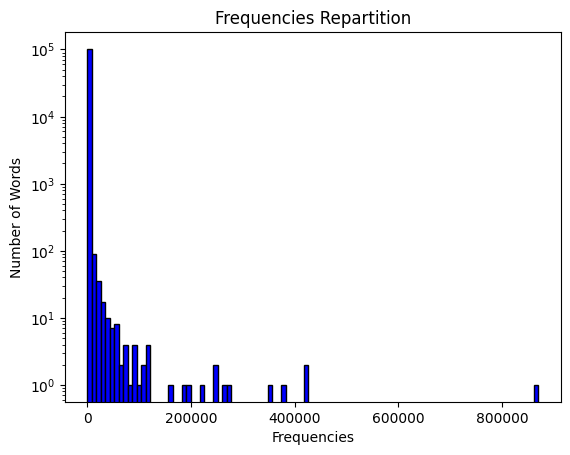

In [ ]:
# TODO
frequencies = list(tokenizer.frequencies.values())
plt.hist(frequencies,bins=100,log=True, color='blue', edgecolor='black')
plt.title('Frequencies Repartition')
plt.xlabel('Frequencies')
plt.ylabel('Number of Words')
plt.show


🚧 **Question** 🚧

What do you think of the repartition?

**Answer**

The repartition of word frequencies, as visualized in the histogram, exhibits a hyperbolic decay reminiscent of
$y=1/x$, a manifestation of Zipf's law. This law stipulates that a small number of words will occur very frequently, while the vast majority of words will occur rarely.



🚧 **TODO** 🚧

Plot the frequencies repartition. Find the best corresponding Zipf law (seen during the course) and plot it on the same figure.

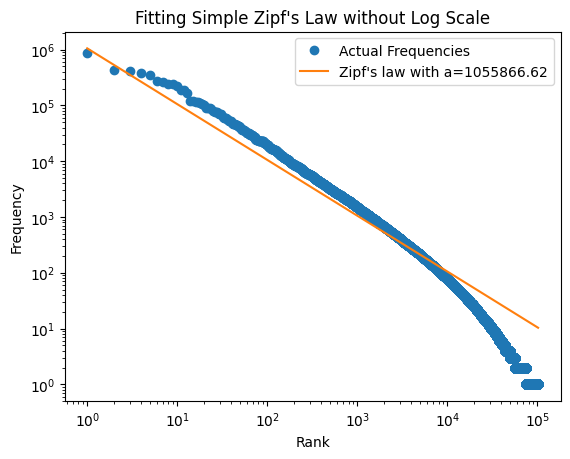

In [ ]:
# TODO
from scipy.optimize import curve_fit

#Define a simplified Zipf's law function
def simple_zipf(r, a):
    return a / r


frequencies = sorted(list(tokenizer.frequencies.values()), reverse=True)

ranks = np.arange(1, len(frequencies)+1)


para, _ = curve_fit(simple_zipf, ranks, frequencies)


a = para[0]


zipf = simple_zipf(ranks, a)


plt.plot(ranks, frequencies, marker="o", linestyle="", label="Actual Frequencies")
plt.plot(ranks, zipf, label=f"Zipf's law with a={a:.2f}")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Fitting Simple Zipf\'s Law without Log Scale')
plt.legend()
plt.show()

## III - DataLoading

This final part aims at making your dataset compatible with PyTorch.

### Text representation

Since we plan to work with PyTorch, we need to work with `tensors`. But since a text is only composed of strings, we need to find some numerical representations for the text.

The most basic method is to represent a text by list of tokens. We already used a simple WhiteSpace tokenizer earlier to analyze our texts before cleaning. Now we will use it to *represent* the texts.

🚧 **TODO** 🚧

Modify the code of the `WhiteSpaceTokenizer` so that it could encode a text into a list of token ids and do the reverse (i.e. decode a list of token ids to a text).

In [ ]:
class WhiteSpaceTokenizer:
    def __init__(self):
        # The vocabulary will store the mapping between text tokens and their id.
        self.vocab = {}
        self.id_to_token = {}

        # We will keep track of the number of times a word appears in the corpus.
        self.frequencies = {}


    def split_text(self, text: str) -> List[str]:
        """Converts the text to a list of tokens (substrings)."""
        # TODO
        list_tokens = text.split()
        return list_tokens

    def encode(self, text: str) -> List[int]:
        """Take a text as input and return its associated tokenization, as a list of ids."""
        # TODO
        # Split the text into tokens.
        tokens = self.split_text(text)

        # Convert the tokens to ids.
        token_ids = []
        for token in tokens:
          token_id = self.vocab.get(token, None)
          if token_id is None:
            raise ValueError(f"Token {token} not found in vocabulary.")
          token_ids.append(token_id)

        return token_ids

    def decode(self, ids: List[int]) -> str:
        # TODO
        # Convert the ids to tokens.
        tokens = []
        for token_id in ids:
          token = self.id_to_token.get(token_id, None)
          if token is None:
            raise ValueError(f"Token id {token_id} not found in vocabulary.")
          tokens.append(token)

        # Join the tokens into a text.
        text = " ".join(tokens)
        return text

    def fit(self, corpus: List[str]):
        """Fits the tokenizer to a list of texts to construct its vocabulary."""
        current_id = 0
        for text in tqdm(corpus):

            # Split into substrings.
            list_tokens = self.split_text(text)

            for token in list_tokens:

                # Add the token to the vocabulary
                token_id = self.vocab.get(token, None)

                token_not_in_vocab = token_id is None
                if token_not_in_vocab:
                    self.vocab[token] = current_id#TODO
                    self.id_to_token[current_id] = token#TODO
                    self.frequencies[current_id] = 0
                    token_id = current_id
                    current_id += 1

                self.frequencies[token_id] += 1

        # Total number of words in vocab.
        self.num_words = len(self.vocab)#TODO
        print(f"Built a vocabulary of {self.num_words} words.")


🔴 **TEST**

In [ ]:
tokenizer = WhiteSpaceTokenizer()
toy_dataset = ["the cat is in the kitchen", "i have a dog"]
tokenizer.fit(toy_dataset)
text = "i have a kitchen"
assert tokenizer.encode(text) == [5, 6, 7, 4]
assert tokenizer.decode([0, 1, 2, 7, 8]) == "the cat is a dog"

  0%|          | 0/2 [00:00<?, ?it/s]

Built a vocabulary of 9 words.


🚧 **TODO** 🚧 Now fit it on your dataset.

In [ ]:
# TODO
tokenizer = WhiteSpaceTokenizer()

# Fit the tokenizer to the clean_review column of the df_imdb dataset.
tokenizer.fit(df_imdb["clean_review"])

  0%|          | 0/62155 [00:00<?, ?it/s]

Built a vocabulary of 102158 words.


🚧 **Question** 🚧
Look at the following code:

In [ ]:
tokenizer.encode("the king is in the câstle")

ValueError: ignored

a) Does it raise an exception? Explain what is the problem with the above situation.

b) In which real life scenario could such a situation appear?

**Answer**



a) Yes,it raise an exception.

When executing tokenizer.encode("the king is in the câstle"), no preprocessing is performed. However, our vocabulary library is built based on the preprocessed text, so it does not contain words like "câstle", which Cause exception.

b) In real life, this scenario appear when we have a bad data preprocessing, or sometimes, we don't have enough words in our vocabulary, such as slang words, trending terms, etc.

For example, an app intended for English-speaking users may not be able to correctly process or recognize French words that contain phonetic symbols or special characters.


🚧 **TODO** 🚧

Propose a simple modification of the tokenizer code such that it doesn't raise an exception anymore. It should handle the presence of any unknown token.

The following code should't raise any exception.

**Solution: We will add <UNK> token to every unknown vocab, and make sure every unknown word will get the same token_id**

In [ ]:
class WhiteSpaceTokenizer:
    def __init__(self):
        # The vocabulary will store the mapping between text tokens and their ids.
        self.vocab = {}
        self.id_to_token = {}

        # We will keep track of the number of times a word appears in the corpus.
        self.frequencies = {}

        # Add the special token for unknown tokens to the vocabulary.
        self.vocab["<UNK>"] = 0
        self.id_to_token[0] = "<UNK>"

    def split_text(self, text: str) -> List[str]:
        """Converts the text to a list of tokens (substrings)."""
        # TODO
        list_tokens = text.split()
        return list_tokens

    def encode(self, text: str) -> List[int]:
        """Take a text as input and return its associated tokenization, as a list of ids."""
        # TODO
        # Split the text into tokens.
        tokens = self.split_text(text)

        # Convert the tokens to ids.
        token_ids = []
        for token in tokens:
            token_id = self.vocab.get(token, 0)
            token_ids.append(token_id)

        return token_ids

    def decode(self, ids: List[int]) -> str:
        # TODO
        # Convert the ids to tokens.
        tokens = []
        for token_id in ids:
            token = self.id_to_token.get(token_id, None)
            if token is None:
                token = "<UNK>"
            tokens.append(token)

        # Join the tokens into a text.
        text = " ".join(tokens)
        return text

    def fit(self, corpus: List[str]):
        """Fits the tokenizer to a list of texts to construct its vocabulary."""
        current_id = 1
        for text in tqdm(corpus):

            # Split into substrings.
            list_tokens = self.split_text(text)

            for token in list_tokens:

                # Add the token to the vocabulary.
                token_id = self.vocab.get(token, None)

                token_not_in_vocab = token_id is None
                if token_not_in_vocab:
                    self.vocab[token] = current_id
                    self.id_to_token[current_id] = token
                    self.frequencies[current_id] = 0
                    token_id = current_id
                    current_id += 1

                self.frequencies[token_id] += 1

        # Total number of words in vocab.
        self.num_words = len(self.vocab)
        print(f"Built a vocabulary of {self.num_words} words.")

🔴 **TEST**

In [ ]:
tokenizer = WhiteSpaceTokenizer()

# Fit the tokenizer to the clean_review column of the df_imdb dataset.
tokenizer.fit(df_imdb["clean_review"])

  0%|          | 0/62155 [00:00<?, ?it/s]

Built a vocabulary of 102159 words.


In [ ]:
allowed_characters = (string.ascii_uppercase + string.digits).replace(" ", "")
for _ in range(1000):
    word_that_do_not_exist = "".join(random.choices(allowed_characters, k=100))
    encoding = tokenizer.encode(f"the king is in the {word_that_do_not_exist}")
    assert tokenizer.decode(encoding) == "the king is in the <UNK>"

### Dataset for PyTorch
We will be working wtth PyTorch most of the time.
A good practice is to always iterate through a `torch.utils.data.DataLoader`, coupled with `torch.utils.data.Dataset`.

🚧 **TODO** 🚧

We will construct our custom `Dataset` class, that should be fully compatible with the PyTorch API. According to the [documentation](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files), such a dataset should implement at least three methods, `__init__`, `__len__`, `__getitem__`. Complete the following code such that the dataset yields a list of texts.

Requirements:
1. The dataset class should read the data from the csv_file stored in `DATA_PATH`.
2. The dataset should output the raw text, without any cleaning.

In [ ]:
from torch.utils.data import Dataset
import csv

class IMDBDataset(Dataset):
    def __init__(self, file_path: str):
        # TODO
      with open(file_path, "r", encoding="utf-8") as f:
        reader = csv.reader(f)
        self.data = list(reader)

    def __len__(self):
        # TODO
        return len(self.data)


    def __getitem__(self, idx: int):
        # TODO
        idx+=1
        #we indexing +1 to avoid the 'review' & 'label' at the [0] position
        if idx >= len(self.data):
            raise IndexError("Index out of range")
        text = self.data[idx][0]
        label = int(self.data[idx][1])
        return text,label

🔴 **TEST**

In [ ]:
imdb_dataset = IMDBDataset(file_path=DATA_PATH)
text, label = imdb_dataset[0]
type(label_column[0])
assert text == text_column[0]


In [ ]:
imdb_dataset = IMDBDataset(file_path=DATA_PATH)
text, label = imdb_dataset[0]
assert text == text_column[0]
assert label == label_column[0]

### DataLoader for PyTorch

Now that the dataset is ready, we should be able to iterate through it. This is done with a `DataLoader`.

The `DataLoader` also has some handy functionnalities:
1. Batch iteration.
2. Collate function.

The collate function corresponds to the argument `collate_fn` of the constructor of `torch.utils.data.DataLoader`.

This function is applied on the fly to each sample of the dataset.

Our `IMDBDataset` only outputs raw texts. During the iteration through the `DataLoader`, we would like to:
1. Clean the dataset with our cleaning function `preprocess_text`.
2. Convert the text to a list of tokens.
3. The `DataLoader`, for a batch size of `N`, should yield a dictionnary `{"token_ids": ..., "labels": ...,}` with `"token_ids"` corresponding to a list of `N` lists of tokens ids, and `"labels"` to a list of size `N` with the corresponding labels.

🚧 **TODO** 🚧

Write the `collate_fn` function so that the above requirements are satisfied (i.e., clean and tokenize).

In [ ]:
# TODO
def collate_fn(batch):
  texts = [item[0] for item in batch]
  labels = [item[1] for item in batch]

  # Clean the texts.
  texts = [preprocess_text(text) for text in texts]

  # Convert the texts to lists of token ids.
  token_ids = [tokenizer.encode(text) for text in texts]

  # Return a dictionary containing the token ids and labels.
  return {"token_ids": token_ids, "labels": labels}

In [ ]:
from torch.utils.data import DataLoader

🔴 **TEST**

In [ ]:
for batch_size in range(1, 10):
    dataloader = DataLoader(
        dataset=imdb_dataset, batch_size=batch_size, collate_fn=collate_fn
    )
    for batch in dataloader:
        token_ids = batch["token_ids"]
        labels = batch["labels"]
        assert len(token_ids) == batch_size
        assert len(labels) == batch_size
        assert isinstance(token_ids[0][0], int)
        assert (isinstance(labels[0], int)) or isinstance(labels[0], np.int64)
        break

🚧 **Question** 🚧

Write a concise summary on what you learned with this lab.

**Answer**

What we have learned through this lab:
1. How to step by step process + tokenize the text data into tokens that we can learn from.
2. How to prepare the raw data.
2. How to deal with unknown word from the data.
3. Workflow when we want to work with text data (or data in general)